# Visualization 1
Creating data visualizations using Seaborn. 

In [1]:
import seaborn as sns
import pandas as pd

# These two lines setup the Seaborn style 
sns.set_theme()
sns.set_context('talk')

### Question 1
In the "Why Visualize?" video, we showed the Anscombe's Quartet example. It contains four different sets of data, each of which have similar summary statistics, but which are very different visually. We import and preview the dataset below.

In [2]:
quartet = sns.load_dataset('anscombe')
quartet.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Answer the following questions:

1. Group the data by `dataset` and compute the mean of the `x` and `y` values for each to confirm the claim that the summary statistics (at least the means) are the same for the four datasets.
2. With a single Seaborn plot function call, plot the scatterplot of `x` on the horizontal and `y` on the vertical with the `dataset`s distinguished by color (i.e., using the `hue` parameter).
3. With a single Seaborn plot function call, plot the scatterplot of `x` on the horizontal and `y` on the vertical, but this time have each of the four datasets as their own subplot (i.e., plot each as a separate subfigure using, for example, the `col` parameter).

<ipython-input-3-419ae53bc412>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(quartet.groupby("dataset")["x", "y"].agg("mean"))


           x         y
dataset               
I        9.0  7.500909
II       9.0  7.500909
III      9.0  7.500000
IV       9.0  7.500909


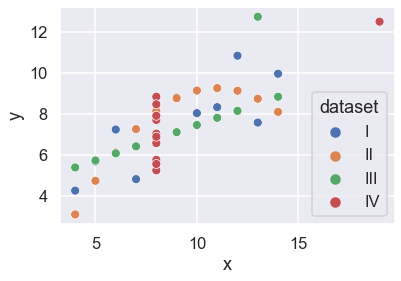

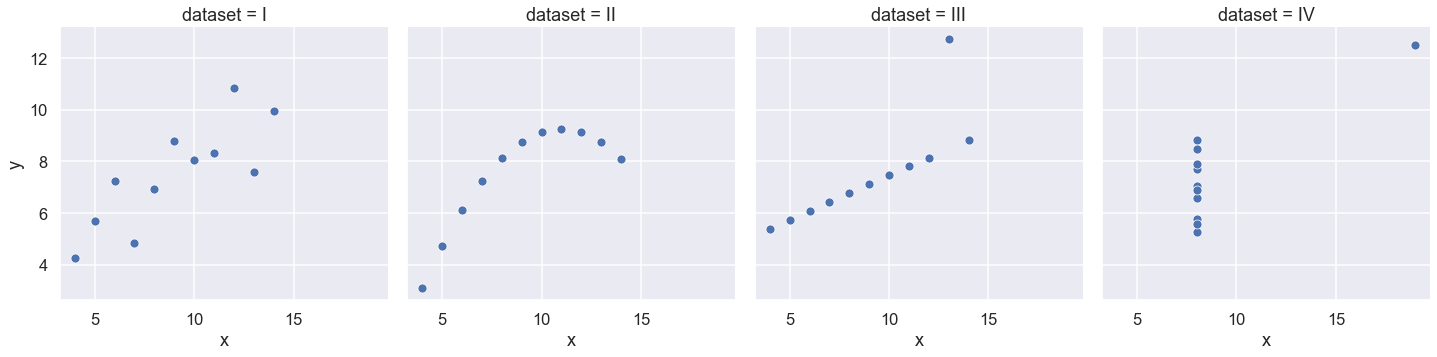

In [3]:
# 1 Group the data by dataset and compute the mean of the x and y values for each to confirm the claim that the summary statistics (at least the means) are the same for the four datasets.
print(quartet.groupby("dataset")["x", "y"].agg("mean"))
# 2 With a single Seaborn plot function call, plot the scatterplot of x on the horizontal and y on the vertical with the datasets distinguished by color (i.e., using the hue parameter).
sns.scatterplot(data=quartet, x="x", y="y", hue="dataset")
# 3 With a single Seaborn plot function call, plot the scatterplot of x on the horizontal and y on the vertical, but this time have each of the four datasets as their own subplot (i.e., plot each as a separate subfigure using, for example, the col parameter).
sns.relplot(data=quartet, x="x", y="y", col="dataset", kind="scatter")

### Question 2
Below we import a dataset `cars` containing information about automobiles manufactured in the 1970s. We will use this for the next several questions.

In [4]:
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Answering the following questions:
1. Use a single **bar** plot to visualize the average mpg of the three different origins: `usa`, `japan`, and `europe`.
2. Use a single **box** plot to visualize the the distribution of mpg for each of the three origins of car (`usa`, `japan`, and `europe`).
3. Group the data by `origin` and compute the maximum `mpg` for each group. Do these values match with the top horizontal line of the boxplot for each group? Why or why not? 

<AxesSubplot:xlabel='origin', ylabel='mpg'>

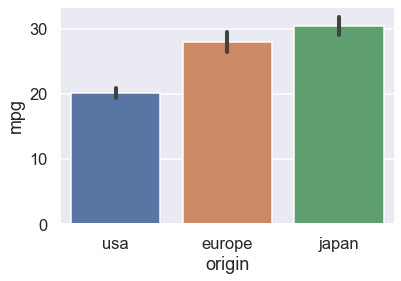

In [5]:
# 1 Use a single bar plot to visualize the average mpg of the three different origins: usa, japan, and europe.
sns.barplot(x="origin", y="mpg", order=["usa", "europe", "japan"], data=cars)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

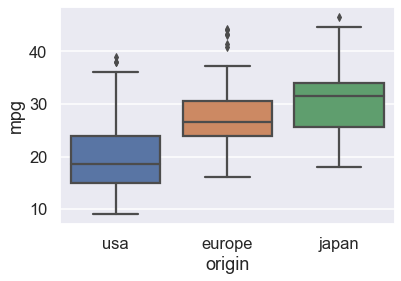

In [6]:
# 2 Use a single box plot to visualize the the distribution of mpg for each of the three origins of car (usa, japan, and europe).
sns.boxplot(x="origin", y="mpg", order=["usa", "europe", "japan"], data=cars)

In [7]:
# 3. Group the data by origin and compute the maximum mpg for each group. Do these values match with the top horizontal line of the boxplot for each group? Why or why not?
print(cars.groupby("origin")["mpg"].agg("max"))

origin
europe    44.3
japan     46.6
usa       39.0
Name: mpg, dtype: float64


*Write your answer to Q3.3 here*

No, because the top horizontal line of the boxplot for each group represents the upper quartile, which is less than the maximum mpg value for each group.

### Question 3
1. Use a scatter plot to visualize the relationship between `horsepower` and `mpg`. Plot `horsepower` along the horizontal axis and `mpg` along the vertical axis. Color the points in the scatter plot according to the place of `origin`.
2. Use a lineplot to visualize the change in `mpg` with respect to `model_year` for each of the three origins (`usa`, `japan`, and `europe`). Plot three separate lines on the same visualization, one for each of the origins, colored or otherwise labeled to distinguish them.
3. Make a line plot just like in part 2, but show the change in `weight` with respect to `model_year` instead of `mpg`.

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

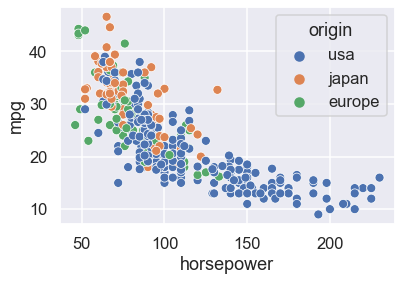

In [8]:
# 1. Use a scatter plot to visualize the relationship between horsepower and mpg. Plot horsepower along the horizontal axis and mpg along the vertical axis. Color the points in the scatter plot according to the place of origin.
sns.scatterplot(x="horsepower", y="mpg", hue="origin", data=cars)

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

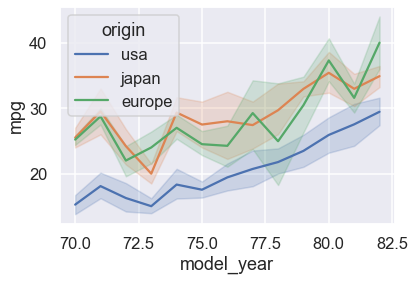

In [9]:
# 2. Use a lineplot to visualize the change in mpg with respect to model_year for each of the three origins (usa, japan, and europe). Plot three separate lines on the same visualization, one for each of the origins, colored or otherwise labeled to distinguish them.
sns.lineplot(data=cars, x="model_year", y="mpg", hue="origin")

<AxesSubplot:xlabel='model_year', ylabel='weight'>

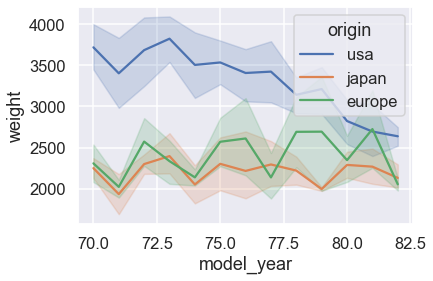

In [10]:
# 3. Make a line plot just like in part 2, but show the change in weight with respect to model_year instead of mpg.
sns.lineplot(data=cars, x="model_year", y="weight", hue="origin")

### Question 4
1. Create a histogram showing the distribution of just `horsepower`, i.e., showing how many cars had different amounts of `horsepower` (there is no need to distinguish between origin).
2. With a single Seaborn plot function call, plot the histogram for `horsepower` for each possible value of the number of `cylinders` using the `col` parameter (this should result in a subfigure for each value in `cylinders`).
3. Plot a heat map with `horsepower` on the horizontal and `weight` on the vertical. Make sure to display a color bar to interpret the heatmap (e.g., by setting `cbar=True`).  

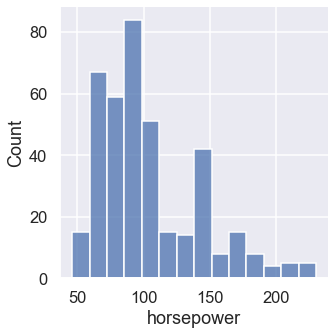

In [11]:
# 1 Create a histogram showing the distribution of just horsepower, i.e., showing how many cars had different amounts of horsepower (there is no need to distinguish between origin).
sns.displot(data=cars, x="horsepower")

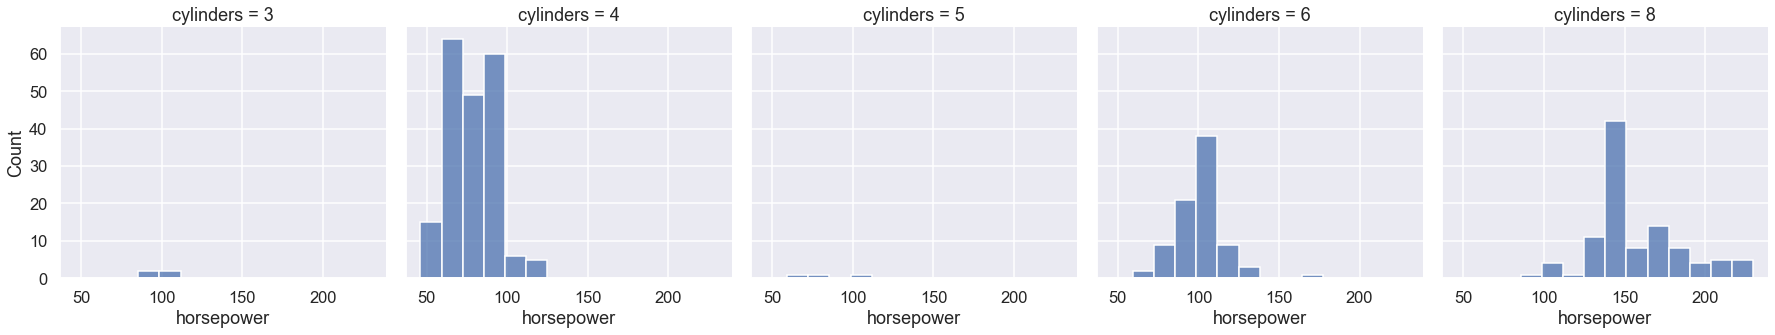

In [12]:
# 2. With a single Seaborn plot function call, plot the histogram for horsepower for each possible value of the number of cylinders using the col parameter (this should result in a subfigure for each value in cylinders).
sns.displot(data=cars, x="horsepower", col="cylinders")

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

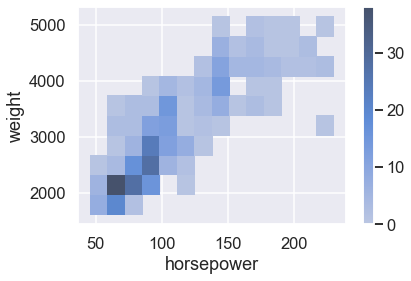

In [13]:
# 3. Plot a heat map with horsepower on the horizontal and weight on the vertical. Make sure to display a color bar to interpret the heatmap (e.g., by setting cbar=True).
sns.histplot(data=cars, x="horsepower", y="weight", cbar=True)

### Question 5
Below we import the `covid-19.csv` dataset. In the same figure, for each of the `Province/State`s in the list `states = ["Washington", "North Carolina", "New York", "Ohio", "Hawaii"]`, plot the change in the `Confirmed` cases over time (i.e., `ObservationDate`). Distinguish the states with different colors (i.e., using the `hue` parameter). 

In [14]:
covid = pd.read_csv("covid-19.csv", parse_dates=["ObservationDate"])
states = ["Washington", "North Carolina", "New York", "Ohio", "Hawaii"]
sns.set_context("paper")
covid.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


<AxesSubplot:xlabel='ObservationDate', ylabel='Confirmed'>

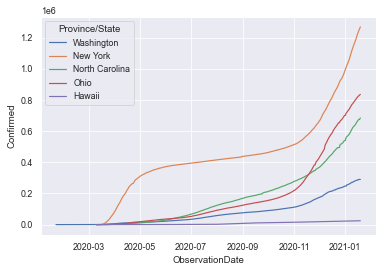

In [15]:
# Put your code to answer the question here
# feel free to add more cells as needed
c = covid.loc[covid["Province/State"].isin(states)]
sns.lineplot(data=c, x="ObservationDate", y="Confirmed", hue="Province/State")